# Chapter 7: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [11]:
!git clone https://github.com/chentinghao/download_google_drive.git ../data/download_google_drive

Cloning into '../data/download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), 4.77 KiB | 116.00 KiB/s, done.


In [16]:
!poetry run python ../data/download_google_drive/download_gdrive.py 0B7XkCwpI5KDYNlNUTTlSS21pQmM ../data/google_news.bin.gz

../data/download_google_drive/download_gdrive.py:50: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(sys.argv) is not 3:
1.53GB [00:32, 50.5MB/s]


In [32]:
from gensim.models import KeyedVectors

In [33]:
model = KeyedVectors.load_word2vec_format('../data/google_news.bin.gz', binary=True)

In [34]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ．

In [35]:
model.similarity('United_States', 'U.S.')

0.73107743

## 62. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [36]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [37]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

## 64. アナロジーデータでの実験

[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [10]:
!wget "http://download.tensorflow.org/data/questions-words.txt" -P ../data/

--2020-11-04 11:02:14--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.174.112, 2404:6800:4004:819::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.174.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘../data/questions-words.txt.1’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.02s   

2020-11-04 11:02:14 (36.6 MB/s) - ‘../data/questions-words.txt.1’ saved [603955/603955]



In [38]:
!head ../data/questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [39]:
!sed --in-place '/^:/d' ../data/questions-words.txt

In [40]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

/mnt/Storage/Users/shu/.cache/pypoetry/virtualenvs/nlp100-st2962ze-py3.8/lib/python3.8/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [41]:
df = pd.read_csv('../data/questions-words.txt', sep=' ', header=None)

In [42]:
df.columns = ['one', 'two', 'three', 'four']

In [60]:
def infer(row):
    res = model.most_similar(positive=[row['two'], row['three']], negative=[row['one']], topn=1)
    return pd.Series([res[0][0], res[0][1]])

In [61]:
df[['five', 'six']] = df.progress_apply(infer, axis=1)

100%|██████████| 19544/19544 [42:07<00:00,  7.73it/s]


In [62]:
df.to_csv('../data/questions-words-infered.txt', sep=' ', index=None)

## 65. アナロジータスクでの正解率

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [63]:
df = pd.read_csv('../data/questions-words-infered.txt', sep=' ')

In [64]:
len(df[df['four'] == df['five']])/len(df)

0.7358780188293083

In [65]:
semantic_df = df.iloc[:8869,:]

In [66]:
syntactic_df = df.iloc[8869:,:]

In [67]:
print('Semantic analogy')
len(semantic_df[semantic_df['four'] == semantic_df['five']]) / len(semantic_df)

Semantic analogy


0.7308602999210734

In [68]:
print('Syntactic analogy')
len(syntactic_df[syntactic_df['four'] == syntactic_df['five']]) / len(syntactic_df)

Syntactic analogy


0.7400468384074942

## 66. WordSimilarity-353での評価

[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [29]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip -P ../data/

--2020-11-04 11:12:53--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘../data/wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K   133KB/s    in 0.2s    

2020-11-04 11:12:54 (133 KB/s) - ‘../data/wordsim353.zip’ saved [23257/23257]



In [70]:
!unzip ../data/wordsim353.zip -d ../data/wordsim353

Archive:  ../data/wordsim353.zip
  inflating: ../data/wordsim353/combined.csv  
  inflating: ../data/wordsim353/set1.csv  
  inflating: ../data/wordsim353/set2.csv  
  inflating: ../data/wordsim353/combined.tab  
  inflating: ../data/wordsim353/set1.tab  
  inflating: ../data/wordsim353/set2.tab  
  inflating: ../data/wordsim353/instructions.txt  


In [72]:
!cat ../data/wordsim353/instructions.txt

Estimation of word similarity
-----------------------------


Hello,

We kindly ask you to assist us in a psycholinguistic experiment, 
aimed at estimating the similarity of various words in the English 
language. The purpose of this experiment is to assign similarity scores 
to pairs of words, so that machine learning algorithms can be 
subsequently trained and adjusted using human-assigned scores.

Below is a list of pairs of words. For each pair, please assign 
a numerical similarity score between 0 and 10 (0 = words are totally 
unrelated, 10 = words are VERY closely related). By definition, 
the similarity of the word to itself should be 10. You may assign 
fractional scores (for example, 7.5).

Specific instructions:

1) The questionnaire starts on the next page.
2) Please fill in your full name at the beginning of the questionnaire. 
   We need the names to ensure individual estimations do not get mixed, 
   and to be able to contact you should any clarifications become necessar

In [73]:
!head ../data/wordsim353/combined.csv

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [74]:
sim_df = pd.read_csv('../data/wordsim353/combined.csv')

In [76]:
def cos_sim(row):
    return model.similarity(row['Word 1'], row['Word 2'])

In [78]:
sim_df['Model'] = sim_df.apply(cos_sim, axis=1)

In [81]:
import numpy as np
from scipy.stats import spearmanr

In [86]:
spearmanr(np.array(sim_df['Human (mean)']), np.array(sim_df['Model']))

SpearmanrResult(correlation=0.7000166486272194, pvalue=2.86866666051422e-53)

## 67. k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [106]:
countries = list(df.loc[:5029, :]['two'])

In [107]:
countries.extend(list(df.loc[:5029, :]['four']))

In [108]:
countries.extend(list(df.loc[5030:5866, :]['one']))

In [121]:
countries = list(set(countries))

In [122]:
country_vecs = [model[country] for country in countries]

In [112]:
from sklearn.cluster import KMeans

In [123]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(country_vecs)

KMeans(n_clusters=5)

In [124]:
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print(f'Cluster: {i}')
    print(', '.join([countries[k] for k in cluster]))

Cluster: 0
Philippines, Australia, Cambodia, Thailand, Bangladesh, India, China, Laos, Fiji, Japan, Nepal, Taiwan, Bhutan, Vietnam, Indonesia, Korea, Malaysia
Cluster: 1
Canada, Croatia, Italy, Poland, Lithuania, Greenland, Europe, Romania, Latvia, Austria, Slovenia, Germany, Albania, Ireland, Armenia, Liechtenstein, Greece, Denmark, Belgium, Moldova, Montenegro, Hungary, Bulgaria, Norway, Georgia, Kazakhstan, Turkey, Slovakia, Ukraine, Sweden, Spain, France, USA, Portugal, Serbia, Azerbaijan, Finland, Belarus, Macedonia, Russia, Estonia, Cyprus, England, Malta, Switzerland
Cluster: 2
Rwanda, Gambia, Burundi, Kenya, Morocco, Zambia, Uganda, Mozambique, Sudan, Botswana, Somalia, Mauritania, Madagascar, Mali, Malawi, Eritrea, Gabon, Ghana, Namibia, Algeria, Angola, Zimbabwe, Tunisia, Nigeria, Niger, Liberia, Guinea, Senegal
Cluster: 3
Suriname, Samoa, Bahamas, Belize, Peru, Uruguay, Ecuador, Nicaragua, Tuvalu, Brazil, Honduras, Chile, Mexico, Venezuela, Dominica, Guyana, Cuba, Jamaica, A

## 68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [125]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

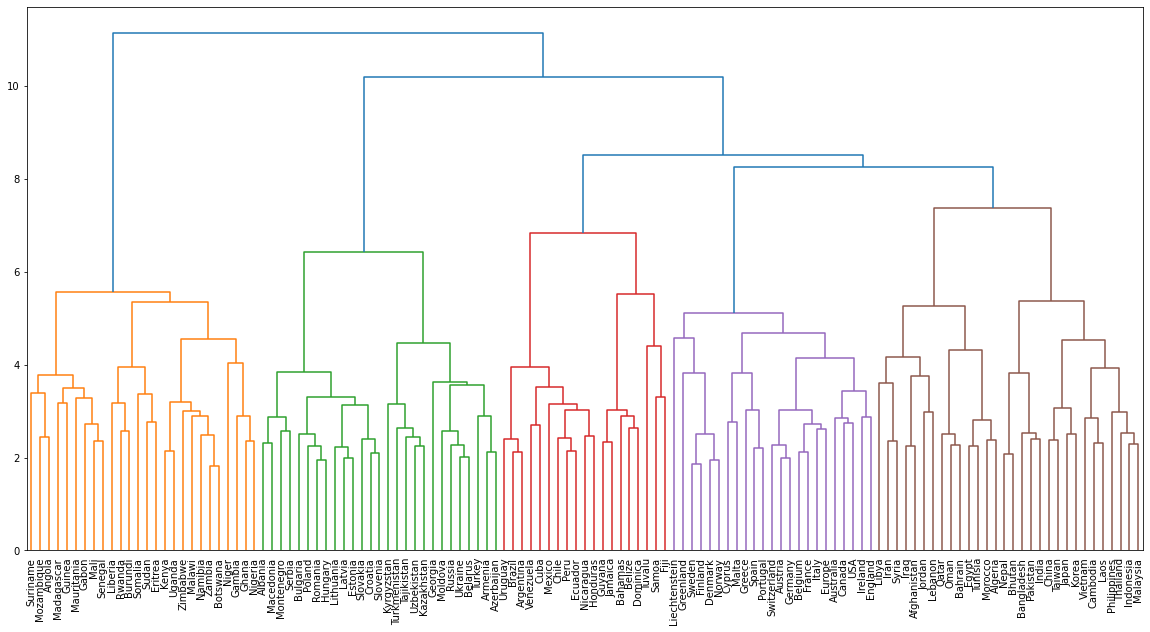

In [131]:
plt.figure(figsize=(20, 10))
Z = linkage(country_vecs, method='ward')
dendrogram(Z, labels=countries)
plt.xticks(fontsize=10)
plt.show()

## 69. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [132]:
from sklearn.manifold import TSNE

In [133]:
X = TSNE(n_components=2).fit_transform(country_vecs)

In [134]:
X.shape

(125, 2)

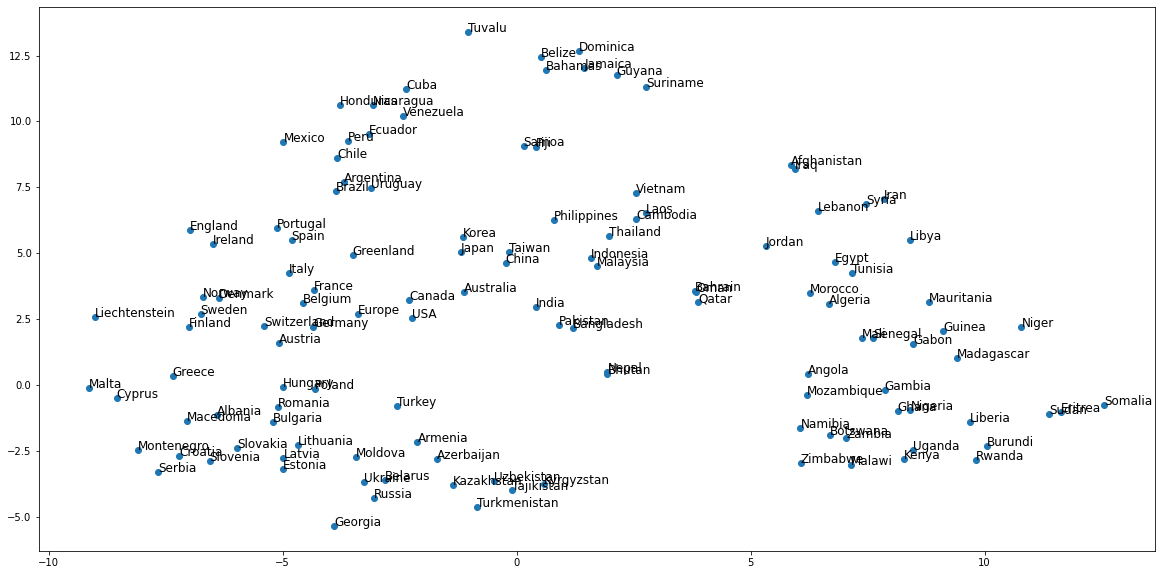

In [142]:
plt.figure(figsize=(20, 10))
plt.scatter(np.array(X).T[0], np.array(X).T[1])
for (x, y), name in zip(X, countries):
    plt.annotate(name, (x, y), fontsize=12)